In [236]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
print(("shape of x_train", x_train.shape))
(("shape of x_test", x_test.shape))

('shape of x_train', (60000, 28, 28))


('shape of x_test', (10000, 28, 28))

In [37]:
x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0],-1))
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0],-1))

In [39]:
print(x_train_df.shape)
x_train_df.head()

(60000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


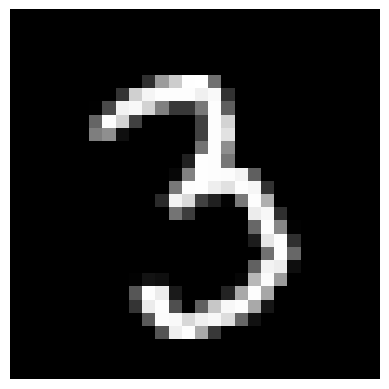

In [47]:
plt.imshow(x_train[30000], cmap='gray')
plt.axis('off')
plt.show()

In [59]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [61]:
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

In [113]:
history = model.fit(
    x_train_df,
    y_train_oh,
    epochs=20,
    batch_size=128,
    validation_data=(x_test_df, y_test_oh)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9607 - loss: 0.1718 - val_accuracy: 0.9489 - val_loss: 0.3356
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9625 - loss: 0.1674 - val_accuracy: 0.9460 - val_loss: 0.3906
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9648 - loss: 0.1549 - val_accuracy: 0.9499 - val_loss: 0.3354
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9656 - loss: 0.1532 - val_accuracy: 0.9538 - val_loss: 0.3260
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9676 - loss: 0.1504 - val_accuracy: 0.9530 - val_loss: 0.3268
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9683 - loss: 0.1415 - val_accuracy: 0.9523 - val_loss: 0.3456
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9686 - loss: 0.1395 - val_accuracy: 0.9551 - val_loss: 0.3725
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9710 - loss: 0.1306 - val_accuracy: 0.

In [118]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [120]:
print("acc: ", history.history["accuracy"])
print()
print("val acc: ", history.history["val_accuracy"])
print()
print("loss: ", history.history["loss"])
print()
print("val loss: ", history.history["val_loss"])

acc:  [0.9607499837875366, 0.9625166654586792, 0.964816689491272, 0.9655500054359436, 0.9676499962806702, 0.9682666659355164, 0.9686333537101746, 0.9710000157356262, 0.9716500043869019, 0.97243332862854, 0.9728500247001648, 0.9739999771118164, 0.974216639995575, 0.9751166701316833, 0.9761499762535095, 0.9772833585739136, 0.9764833450317383, 0.9779000282287598, 0.978600025177002, 0.9793333411216736]

val acc:  [0.9488999843597412, 0.9459999799728394, 0.9498999714851379, 0.9538000226020813, 0.953000009059906, 0.9523000121116638, 0.9550999999046326, 0.9502999782562256, 0.9549000263214111, 0.9524999856948853, 0.9532999992370605, 0.9495000243186951, 0.9545999765396118, 0.9563999772071838, 0.9567999839782715, 0.9567999839782715, 0.9496999979019165, 0.9573000073432922, 0.9555000066757202, 0.9581000208854675]

loss:  [0.1717734932899475, 0.16735431551933289, 0.15486237406730652, 0.15323948860168457, 0.15042780339717865, 0.14152321219444275, 0.1395300179719925, 0.13057102262973785, 0.1255688816

In [83]:
model.evaluate(x_test_df, y_test_oh)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9492 - loss: 0.3452


[0.34521427750587463, 0.9491999745368958]

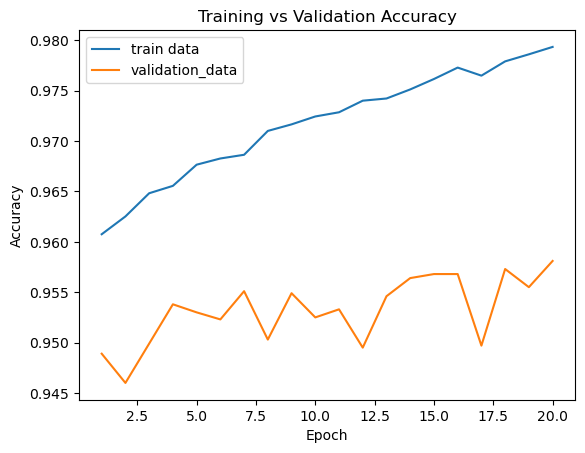

In [122]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = len(history.history["accuracy"])

plt.plot(range(1, epochs + 1), acc, label="train data")
plt.plot(range(1, epochs + 1), val_acc, label="validation_data")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

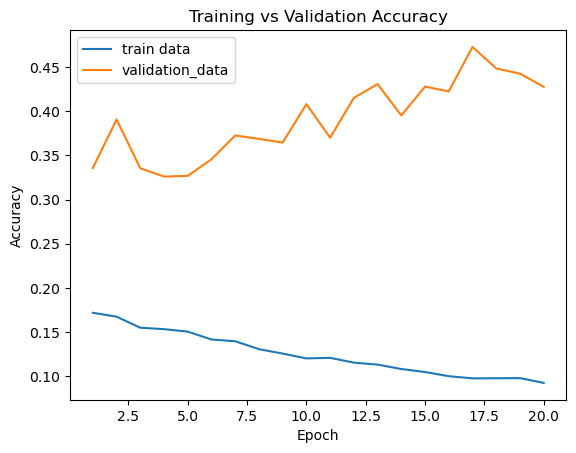

In [124]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = len(history.history["loss"])

plt.plot(range(1, epochs + 1), loss, label="train data")
plt.plot(range(1, epochs + 1), val_loss, label="validation_data")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

In [146]:
y_pred = model.predict(x_test_df)
y_pred = tf.argmax(y_pred, axis=1).numpy()
y_actual = y_test

#cm = confusion_matrix(y_pred, y_actual)
#print(cm)

conf_mat = pd.crosstab(
    y_actual, y_pred,
    rownames=['actual'], colnames=['pred']
)
print(conf_mat)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
pred      0     1    2    3    4    5    6    7    8    9
actual                                                   
0       963     1    0    0    0    1    6    1    7    1
1         0  1122    3    5    0    2    1    0    2    0
2         4     9  989    6    2    0    3    6   12    1
3         4     1   11  952    2   16    0    4   17    3
4         2     1    3    1  946    0    5    2    3   19
5         1     1    1   14    1  847   12    0   12    3
6         8     2    4    1    3    8  924    0    8    0
7         1     1   14    4    3    1    0  972    8   24
8         7     1    4    4    4   17    7    1  919   10
9         6     2    1    7   17    8    0    5   16  947


In [198]:
normalizer = tf.keras.layers.Rescaling(1./255) 

model_b = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_b.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [202]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)
history_b = model_b.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0409 - val_accuracy: 0.9741 - val_loss: 0.0854
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0372 - val_accuracy: 0.9759 - val_loss: 0.0815
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0341 - val_accuracy: 0.9762 - val_loss: 0.0778
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9911 - loss: 0.0319 - val_accuracy: 0.9762 - val_loss: 0.0803
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0294 - val_accuracy: 0.9771 - val_loss: 0.0811
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9929 - loss: 0.0267 - val_accuracy: 0.9763 - val_loss: 0.0790
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9936 - loss: 0.0246 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0226 - val_accuracy: 0.

In [242]:
model_c = Sequential()               # Klammern wichtig!
model_c.add(Flatten())               # Flatten-Schicht (macht 2D → 1D)
model_c.add(Dense(64, activation="relu"))  # Hidden Layer
model_c.add(Dense(10, activation="softmax"))  # Output Layer

model_c.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [248]:
model_c.fit(x_train, y_train_oh, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8919 - loss: 0.5847
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9211 - loss: 0.3862
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9335 - loss: 0.3169
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9414 - loss: 0.2701
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9478 - loss: 0.2447
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9500 - loss: 0.2235
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9542 - loss: 0.2127
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9558 - loss: 0.1941
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9574 - loss: 0.1885
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9589 - loss: 0.1759


In [304]:
y_pred_1 = model_c.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


In [306]:
y_pred_1 = tf.argmax(y_pred_1, axis=1).numpy()

In [308]:
y_pred_1[9]

9